<a href="https://colab.research.google.com/github/burger-okd/Probability_and_Random_Process/blob/master/occupancy_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
From Occupancy problem...
We are placing r balls into n cells randomly, denote the probability of exactly k cells are empty by P_k(r, n).
I'll show you that for a large n it goes to the Poisson distribution

S_k...
P_k(r,n) is expressed as S_k * P_0(r, n-k) and the exact formulation is as below.
Fianlly, P_k(r,n) = (C(n,k)) * sum{(-1)^v * (C(n-k,v)*(1-(k+v)/n)^r} in which the summation is applied to v from 0 to n-k

P_k(r,n) is approximated to the Poisson distribution with mu = n*exp(-r/n)
p_k(r,n) ~ (mu^k/k!)*exp(-mu)

Let's compare the p_k(40,20) and the Poisson distribution for large k(0~20)
"""

import numpy as np
from scipy.special import comb # can use 'itertools.combination' insted
from scipy.stats import poisson


In [ ]:
def k_empty_prob(r,n,k):
    """
    r: the number of the balls
    n: the number of the cells

    p(r,n,k): probability of "exactly" k cells are empty
    P_k(r,n) = C(n,k) * sum{(-1)^v * (C(n-k,v) * (1-(k+v)/n)^r}  :v is from 0 to n-k
    """
    #calculate sum{} term
    sum = 0
    for v in range(r-k+1):
        sum += (-1)**v * (comb(n-k,v) * (1-(k+v)/n)**r)

    prob = comb(n,k) * sum

    return prob

In [ ]:
def poisson_pmf(r,n,k):
    """
    (mu^k/k!)*exp(-mu)
    """
    mu = n*np.exp(-r/n)
    return poisson.pmf(k, mu)

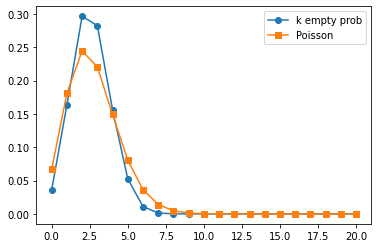

In [ ]:
import matplotlib.pylab as plt

k_empty_prob_list = [k_empty_prob(40,20,k) for k in range(21)]
poisson_pmf_list = [poisson_pmf(40,20,k) for k in range(21)]

#plt.figure(figsize=(8,8))
plt.plot(k_empty_prob_list, label = 'k empty prob', marker ='o')
plt.plot(poisson_pmf_list, label = 'Poisson', marker = 's')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
dict = {'k empty prob': k_empty_prob_list, 'Poisson': poisson_pmf_list, 'Difference': np.abs(np.array(k_empty_prob_list) - np.array(poisson_pmf_list))}
df = pd.DataFrame(dict)
df.tail(10)

,k empty prob,Poisson,Difference
11,2.078647e-09,9.554067e-05,9.553859e-05
12,1.464957e-11,2.155004e-05,2.155003e-05
13,4.423017e-14,4.486894e-06,4.486893e-06
14,4.693081e-17,8.674786e-07,8.674786e-07
15,1.281608e-20,1.565339e-07,1.565339e-07
16,5.326920e-25,2.648071e-08,2.648071e-08
17,1.260536e-30,4.216205e-09,4.216205e-09
18,1.900000e-38,6.340014e-10,6.340014e-10
19,1.818989e-51,9.031869e-11,9.031869e-11
20,0.000000e+00,1.222331e-11,1.222331e-11
